In [1]:
from scipy.spatial import HalfspaceIntersection, ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def render_inequations(halfspaces, feasible_point, xlim, ylim):
    hs = HalfspaceIntersection(np.array(halfspaces), feasible_point)
    fig = plt.figure()
    ax = fig.add_subplot('111', aspect='equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 100)

    for h in halfspaces:
        if h[1]== 0:
            ax.axvline(-h[2]/h[0], color="#2c3e50")
        else:
            ax.plot(x, (-h[2]-h[0]*x)/h[1], color="#2c3e50")
    x, y = zip(*hs.intersections)
    points = list(zip(x, y))
    convex_hull = ConvexHull(points)
    polygon = Polygon([points[v] for v in convex_hull.vertices], color="#34495e")
    ax.add_patch(polygon)
    ax.plot(x, y, 'o', color="#e67e22")

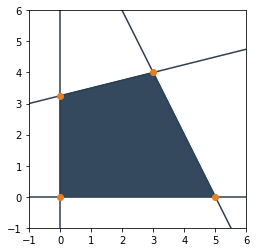

In [2]:
halfspaces = [
    [-1, 0., 0.],    # x₁ ≥ 0
    [0., -1., 0.],   # x₂ ≥ 0
    [-1., 4., -13.], # 4x₂ - x₁ ≤ 13
    [2., 1., -10.]   # x₂ + 2x₁ ≤ 10
]
feasible_point = np.array([0.5, 0.5])
xlim = (-1, 6)
render_inequations(halfspaces, feasible_point, xlim, xlim)